# BharatIntern Machine Learning Task:- 1 

In this task ,  we have to build a Machine Learning model which will house price using various factors like area of house,location of hosue, age of house .

we will we use the data dataset which is available on kaggle.

In [29]:
# import required libraries 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

# for warning error filtering 
import warnings
warnings.filterwarnings('ignore')

In [30]:
# import dataset 
data=pd.read_csv('MagicBricks.csv')


In [31]:
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [33]:
# filling the missing values using median  
data['Bathroom'].fillna(data['Bathroom'].median(),inplace= True)
data['Furnishing'].fillna(method ='ffill',inplace= True)
data['Parking'].fillna(data['Parking'].median(),inplace= True)
data['Type'].fillna(method = 'ffill',inplace= True)
data['Per_Sqft'].fillna(data['Per_Sqft'].median(),inplace= True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1259 non-null   float64
 3   Furnishing   1259 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1259 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1259 non-null   object 
 10  Per_Sqft     1259 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [34]:
# converting categorial data into integer 
from sklearn.preprocessing import LabelEncoder
Furnishing = list(data['Furnishing'])
Locality = list(data['Locality'])
Status = list(data['Status'])
Transaction = list(data['Transaction'])
Type = list(data['Type'])
encoder = LabelEncoder()
e_Furnishing = encoder.fit_transform(Furnishing)
e_Locality = encoder.fit_transform(Locality)
e_Status = encoder.fit_transform(Status)
e_Transaction = encoder.fit_transform(Transaction)
e_Type = encoder.fit_transform(Type)
data['Furnishing'] = e_Furnishing
data['Locality'] = e_Locality
data['Status'] = e_Status
data['Transaction'] = e_Transaction
data['Type'] = e_Type

In [35]:
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,1,283,1.0,6500000,1,0,1,11291.5
1,750.0,2,2.0,1,139,1.0,5000000,1,0,0,6667.0
2,950.0,2,2.0,0,49,1.0,15500000,1,1,0,6667.0
3,600.0,2,2.0,1,281,1.0,4200000,1,1,1,6667.0
4,650.0,2,2.0,1,282,1.0,6200000,1,0,1,6667.0


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x = data.drop(['Price','Status','Transaction','Type','Per_Sqft'], axis = 1 )
y = data['Price']
X_train,X_test,Y_train,Y_test = train_test_split( x , y , test_size = 0.45, random_state = 42)

In [37]:
# Convert continuous values to binary (0 or 1) based on a threshold
threshold = 0.5
Y_train_binary = (Y_train > threshold).astype(int)
Y_test_binary = (Y_test > threshold).astype(int)

# Now you can use Y_train_binary and Y_test_binary for training and evaluation

In [38]:
#using linear regressor model 
from sklearn.linear_model import  LinearRegression
model_1 = LinearRegression()
model_1.fit(X_train,Y_train_binary)
y_1 = model_1.predict(X_test)
score_1 = accuracy_score(Y_test_binary,y_1)*100
print(" The accuracy score  :",score_1)


 The accuracy score  : 100.0


In [39]:
#using Randomforest , gradientboosting model 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
model_2 = RandomForestRegressor()
model_3 = GradientBoostingRegressor()
model_2.fit(X_train,Y_train_binary)
model_3.fit(X_train,Y_train_binary)
y_2 = model_2.predict(X_test)
y_3 = model_3.predict(X_test)
score_2 = accuracy_score(Y_test_binary,y_2)*100
score_3 = accuracy_score(Y_test_binary,y_3)*100
print(" The accuracy score of Randon forest model : ",score_2)
print(" The accuracy score of Gradient boost model :",score_3)

 The accuracy score of Randon forest model :  100.0
 The accuracy score of Gradient boost model : 100.0


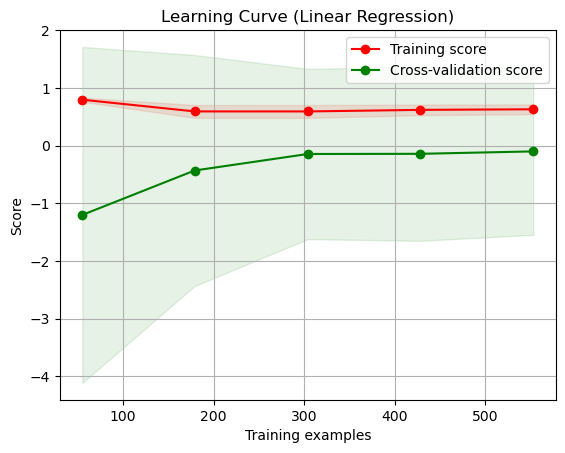

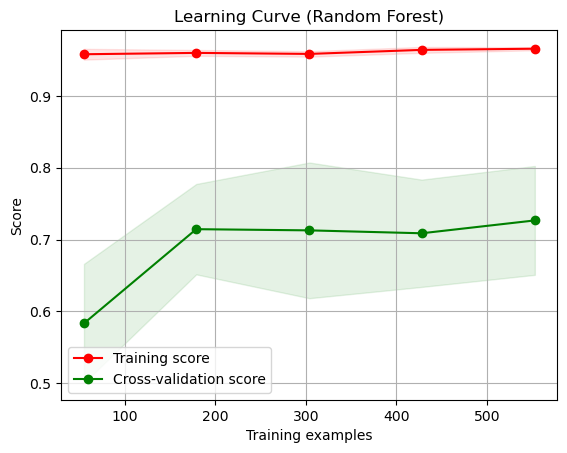

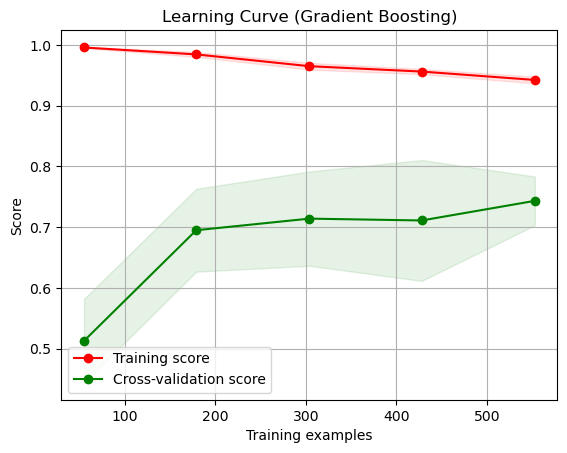

In [40]:

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assuming already defined your models (model_1, model_2, model_3)
models = [model_1, model_2, model_3]
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting']

# Create a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves for each model
for model, name in zip(models, model_names):
    plot_learning_curve(model, f"Learning Curve ({name})", X_train, Y_train, cv=5)

plt.show()